Algoritmos Genéticos y Optimización Heurística - UTN-FRT
# **Trabajo Práctico N°5** 
##**Tema**: Aplicaciones de AG##

Objetivo: Aplicar heurísticas a problemas reales.

## Ejercicio 1

Utilice el AG Simple para resolver el problema del viajante o TSP (Travelling Salesman Problem):
* Se tienen **N** ciudades por las cuales el viajante debe pasar.
* El viajante pasa sólo una vez por cada ciudad.
* Inicia en una ciudad, hace su recorrido y vuelve a la ciudad de inicio.
* El objetivo es encontrar el camino más corto que el viajante debe recorrer para pasar por todas las ciudades.

El caso particular que usted debe resolver consiste de 14 ciudades, cuyas coordenadas son las siguientes (tomar la primera como punto de partida):

Ciudades para el problema de TSP


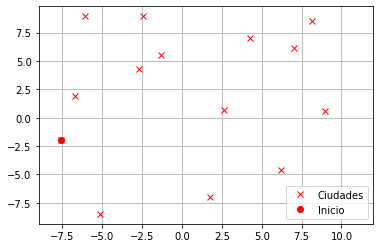

In [ ]:
coordenadas = [
  [-7.5984,-1.9725],
  [-6.7323, 1.8807],
  [-2.7165, 4.2661],
  [-1.2992, 5.5505],
  [-6.1024, 8.9450],
  [-2.4803, 8.9450],
  [ 4.2913, 7.0183],
  [ 7.0472, 6.1009],
  [ 8.1496, 8.4862],
  [ 8.9370, 0.5963],
  [ 2.6378, 0.6881],
  [ 6.1811,-4.6330],
  [ 1.7717,-7.0183],
  [-5.1575,-8.4862]
]

x = [c[0] for c in coordenadas]
y = [c[1] for c in coordenadas]
import matplotlib.pyplot as plt
plt.plot(x, y, 'xr', label='Ciudades');
plt.plot(x[0], y[0], 'or', label='Inicio');
plt.legend()
plt.grid()
plt.xlim([-9,12])
print("Ciudades para el problema de TSP")

El algoritmo requiere conocer las distancias entre las ciudades para poder calcular la distancia total recorrida. Para ello se propone la siguiente funcion para calcular la distancia entre una ciudad *i* y *j*:

In [ ]:
import math
def distancia(coord_i, coord_j):
  #distancia Euclidea
  return math.sqrt((coord_i[0]-coord_j[0])**2 + (coord_i[1]-coord_j[1])**2)

#ejemplo
ciudad_i = 1
ciudad_j = 5
d = distancia(coordenadas[ciudad_i], coordenadas[ciudad_j])
print("Distancia entre ciudad %d y %d; %f"%(ciudad_i, ciudad_j, d))

Distancia entre ciudad 1 y 5; 2.828427


Se pide:
1. Determinar una codificación adecuada (forma de representar las soluciones  para el problema).
2. Definir las restricciones para los valores en la solución (determinar la matriz de *Bounds*).
3. En base a la codificación elegida, definir una función *Fitness* que permita encontrar buenas soluciones en base al objetivo del problema.
4. Determinar una arquitectura de algoritmos genéticos adecuada para resolver el problema:
  * Definir que tipo de algoritmo genético utilizar.
  * Elegir los operadores genéticos a utilizar.
5. Ajustar los parámetros adecuadamentes usando los criterios utilizados en los prácticos anteriores. La cantidad de generaciones y tamaño de la población pueden variar al tomar diferentes cantidades de ciudades.

In [ ]:
# Operadores adicionales 

def mut_swap(p, Bounds, n=1):
    m = p.copy()
    #genero permutacion al azar para elegir coordenadas distintas al azar
    r = list(range(len(m)-1))  #r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    o = r[:n]
    #indices de coordenadas destino
    d = r[n:2*n]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
        m[d[i]] = p[o[i]]
    return m

def mut_adjoin_swap(p, Bounds, n=1):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir coordenadas distintas al azar
    r = list(range(len(m)-1))  #r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    o = r[:n]
    #indices de coordenadas destino
    d = [(x + 1) for x in o]  #d = [(x + 1) % len(m) for x in o]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
        m[d[i]] = p[o[i]]
    return m
    
def mut_inversion(p, Bounds):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    #o = [x % len(m) for x in range(r[0], r[1] + (len(m) if r[1] < r[0] else 0))]
    o = [x for x in range(min(r[:2]), max(r[:2]))]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[o[-i-1]]
    return m

def mut_shift_left(p, Bounds):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    #o = [x % len(m) for x in range(r[0], r[1] + (len(m) if r[1] < r[0] else 0))]
    o = [x for x in range(min(r[:2]), max(r[:2]))]
    #indices de coordenadas destino
    d = [x + 1 for x in o]  #d = [(x + 1) % len(m) for x in o]
    d[-1] = o[0]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
    return m

def mut_shift_right(p, Bounds):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    #o = [x % len(m) for x in range(r[0], r[1] + (len(m) if r[1] < r[0] else 0))]
    o = [x for x in range(min(r[:2]), max(r[:2]))]
    #indices de coordenadas destino
    d = [x - 1 for x in o]  #d = [(x - 1) % len(m) for x in o]
    d[0] = o[-1]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
    return m

def xov_partial_map(p1, p2):
    c1 = p1.copy()
    c2 = p2.copy()
    n = len(c1);
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(n))
    random.shuffle(r)
    #creo la mascara
    mask = [0]*n
    for i in range(min(r[:2]), max(r[:2])):
        mask[i] = 1
    #tacho valores que estan en p1 y p2
    m1 = [1]*n
    m2 = [1]*n
    for i in range(n):
        if not mask[i]:
            for j in range(n):
                if p1[i] == p2[j]:
                    m1[j] = 0
                if p2[i] == p1[j]:
                    m2[j] = 0
    j = k = 0
    #pongo calores no tachados en c1 y c2
    for i in range(n):
        if mask[i]:
            while m1[j] == 0:
                j += 1
            while m2[k] == 0:
                k += 1
            c1[i] = p2[j]
            c2[i] = p1[k]
            j += 1
            k += 1
    return c1, c2

def xov_order_based(p1, p2):
    c1 = p1.copy()
    c2 = p2.copy()
    n = len(c1)
    #crear mascara al azar
    mask = [random.randint(0,1) for i in range(n)]
    #tacho valores que estan en p1 y p2
    m1 = [1]*n
    m2 = [1]*n
    for i in range(n):
        if not mask[i]:
            for j in range(n):
                if p1[i] == p2[j]:
                    m1[j] = 0
                if p2[i] == p1[j]:
                    m2[j] = 0
    j = k = 0
    #pongo calores no tachados en c1 y c2
    for i in range(n):
        if mask[i]:
            while m1[j] == 0:
                j += 1
            while m2[k] == 0:
                k += 1
            c1[i] = p2[j]
            c2[i] = p1[k]
            j += 1
            k += 1
    return c1, c2

## Ejercicio 2

Se tiene una red de distribución eléctrica como la de la Figura, compuesta por un transformador trifásico que alimenta a N=20 clientes monofásicos. Un cliente solo puede estar conectado a una fase.

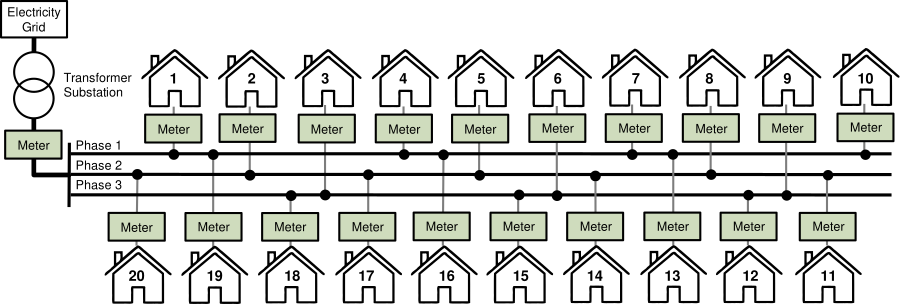








Cada cliente cuenta con un medidor inteligente que registra cuánta energía ha consumido durante un mes. Los valores de consumo son los siguentes:




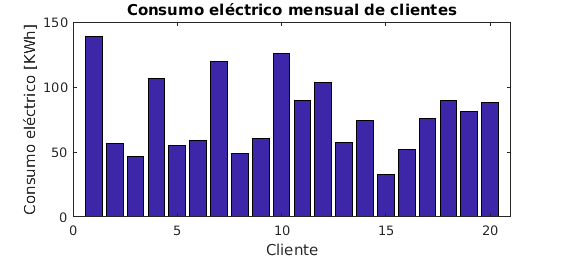




La energía total registrada en la fase "i" del transformador puede ser calculada sumando la energía consumida por todos los clientes conectados a dicha fase. Los consumos por fase son:




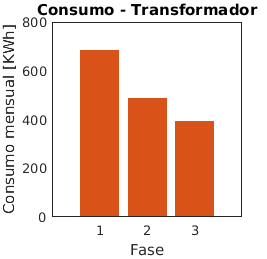




Debido a que existe una gran diferencia de consumo entre las fases, pueden ocurrir pérdidas de energía y se reduce la calidad del servicio eléctrico, entre otros inconvenientes.

Se pide resolver el problema de balance de carga, el cual consiste en equilibrar el valor del consumo eléctrico en cada una de las fases. Para lograrlo se pude cambiar de fase a algunos clientes. Dicho en otras palabras, se pide encontrar un nuevo esquema de conexión, de manera tal que el consumo total en cada fase sea aproximadamente el mismo.

Resuelva las siguientes dos variantes del problema:
1.  Teniendo en cuenta sólo reducir el desbalance de cargas en el transformador.
2.  Teniendo en cuenta reducir el desbalance con la mínima cantidad de cambios de fase.

Se pide:
*   Determine qué codificación utilizará para el problema (cómo representará las soluciones).
*   Diseñe una función de evaluación.
*   Seleccione los operadores genéticos adecuados para el problema.
*   Utilice un AG simple para encontrar una solución al problema.



In [ ]:
#lista con valores de consumo para cada cliente.
consumos_iniciales = [138.49, 56.85, 46.56, 106.58, 54.62, 58.88, 119.36, 49.01, 60.48, 126.07, 89.31, 103.11, 57.18, 74.37, 32.46, 52.30, 75.53, 89.57, 81.36, 88.20]

#lista con valor de la fase donde se conecta el cliente.
fases_iniciales = [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2]

def consumo_fases(consumos_clientes, fases_clientes):
    # Calcular el consumo total por fase a partir del consumo de clientes.
    # Parametros
    # - consumos_clientes: lista con valores de consumo para cada cliente.
    # - fases_clientes: lista con valor de la fase donde se conecta el cliente (valores 1,2 o 3).
    # - Devuelve vector con 3 elementos.

    consumos_fases = [0, 0, 0]
    for i, c in enumerate(consumos_clientes):
        consumos_fases[fases_clientes[i]-1] += c
    return consumos_fases


def indice_desbalance(consumo_fases):
    # Calcula el indice para medir el desbalance de las fases (más alto, más desbalanceado)

    return (max(consumo_fases) / (sum(consumo_fases)/3) - 1) * 100


def fitness_balance_carga(solucion):
    
    #### COMPLETAR ####
    # llamando a "consumo_fases"
    # llamando a "indice_desbalance"
    # fitness = ...
    ####
    
    return ...



## Ejercicio 3
Se tiene el siguiente modelo simplificado del funcionamiento de un sector de una fábrica de azúcar: Se tienen **N** tachos de cocimiento, cada uno de los cuales consume vapor de una determinada manera a lo largo del tiempo. El consumo total de vapor puede calcularse como la suma del consumo de vapor individual de cada tacho. El tiempo entre que empieza a consumir el primer tacho hasta que deja de consumir el último tacho es **tMAX** (llamado tiempo total del ciclo o *timespan*). Durante este tiempo, el consumo de vapor varía en el tiempo, consumiendo mayor energía mientras mayor sea esta variación. Este problema consiste en reducir la energía que se consume por la variación de vapor a lo largo del ciclo de cocimiento de la azúcar. A continuación se brindan detalles del modelado del problema:

Un tacho de cocimiento consume vapor durante un lapso de tiempo. El proceso arranca en el tiempo t0, y finaliza en t1 = t0+1 donde ya se consumió todo el vapor del tacho. Es decir, el proceso dura *una unidad de tiempo*. Este comportamiento se puede modelar como una parábola con las ramas hacia abajo, donde alcanza su máximo en t = 1, y está definida en el intervalo  t0 ≤ t ≤ t0+1, siendo nulo fuera de dicho intervalo. Es decir:

  * VaporTacho_i(t) = **0**, *si 0 ≤ t ≤ t0*
  * VaporTacho_i(t) = **1 - (2 * t0 - 2t + 1)^2**, *si t0 ≤ t ≤ t0+1*
  * VaporTacho_i(t) = **0**, *si t1 ≤ t ≤ tMAX*

Consumo de vapor para un tacho, tomando como ejemplo t0 = 1.000000


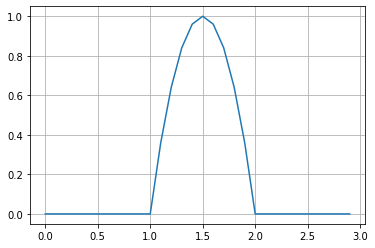

In [ ]:
def VaporTacho_i(t, t0):
  return 1 - (2*t0-2*t + 1)**2 if t > t0 and t < t0+1 else 0

import matplotlib.pyplot as plt
t0 = 1
intervalo = [x/10 for x in range(30)]
vt = [VaporTacho_i(t,t0) for t in intervalo]
plt.figure()
plt.plot(intervalo, vt);
plt.grid()
print('Consumo de vapor para un tacho, tomando como ejemplo t0 = %f'%t0)

Ahora suponga que la fábrica cuenta con una cantidad de tachos de cocimiento **N** que puede variar entre 5 y 20. Los tachos arrancan de manera
independiente entre ellos, y el vapor total puede ser calculado en cada instante de tiempo sumando el vapor producido por cada tacho. Es decir:

* VaporTotal(t) = SUM_i { VaporTacho_i(t) }

Consumo de vapor total con dos tachos, tomando como ejemplo t0 = 0.800000 y t0=1.100000


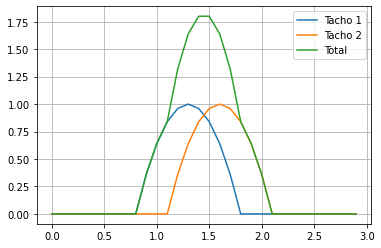

In [ ]:
def VaporTotal(t_inicios, intervalo):
  return [sum([VaporTacho_i(t,t0) for t0 in t_inicios]) for t in intervalo]

t0_1 = 0.8
t0_2 = 1.1
vt1 = [VaporTacho_i(t, t0_1) for t in intervalo]
vt2 = [VaporTacho_i(t, t0_2) for t in intervalo]
plt.plot(intervalo, vt1, label='Tacho 1');
plt.plot(intervalo, vt2, label='Tacho 2');
vtotal = VaporTotal([t0_1, t0_2], intervalo)
plt.plot(intervalo, vtotal, label='Total');
plt.legend()
plt.grid()
print('Consumo de vapor total con dos tachos, tomando como ejemplo t0 = %f y t0=%f'%(t0_1,t0_2))

El objetivo del problema es diseñar un Algoritmo Genético que organice el cronograma de arranques (*Schedule*) de los tachos, de manera que:
* Todos los tachos deben completar su ciclo.
* Se estabilizce el consumo de vapor total (que no existan grandes variaciones de vapor durante todo el proceso). Es decir, se prefieren soluciones que produzcan un consumo de vapor "*constante*".
* Se prefieren soluciones que brinden un tiempo total de funcionamiento menor.
* Se debe evitar la convergencia hacia las soluciones triviales e incorrectas:
* El algoritmo debe ser general, funcionando para diferente cantidad de tachos **N**.
  * Donde el tiempo total es mínimo debido a que todos los tachos arrancan juntos.
  * Los tachos arrancan uno despues de otro (no se superponen).

Soluciones triviales a evitar:


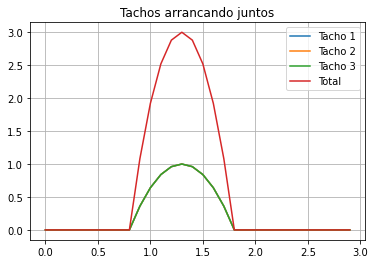

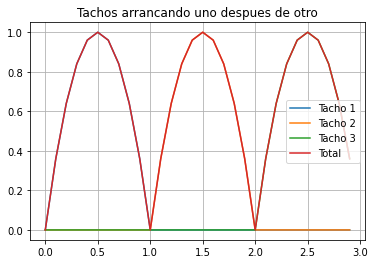

In [ ]:
t0_1 = 0.8
t0_2 = 0.8
t0_3 = 0.8
vt1 = [VaporTacho_i(t, t0_1) for t in intervalo]
vt2 = [VaporTacho_i(t, t0_2) for t in intervalo]
vt3 = [VaporTacho_i(t, t0_3) for t in intervalo]
vtotal = VaporTotal([t0_1, t0_2, t0_3], intervalo)
plt.plot(intervalo, vt1, label='Tacho 1');
plt.plot(intervalo, vt2, label='Tacho 2');
plt.plot(intervalo, vt3, label='Tacho 3');
plt.plot(intervalo, vtotal, label='Total');
plt.legend()
plt.grid()
plt.title('Tachos arrancando juntos')

t0_1 = 0
t0_2 = 1
t0_3 = 2
vt1 = [VaporTacho_i(t, t0_1) for t in intervalo]
vt2 = [VaporTacho_i(t, t0_2) for t in intervalo]
vt3 = [VaporTacho_i(t, t0_3) for t in intervalo]
vtotal = VaporTotal([t0_1, t0_2, t0_3], intervalo)
plt.figure()
plt.plot(intervalo, vt1, label='Tacho 1');
plt.plot(intervalo, vt2, label='Tacho 2');
plt.plot(intervalo, vt3, label='Tacho 3');
plt.plot(intervalo, vtotal, label='Total');
plt.legend()
plt.grid()
plt.title('Tachos arrancando uno despues de otro')
print("Soluciones triviales a evitar:")

La función fitness, entonces, deberá tener en cuenta las variaciones de vapor total en el tiempo, y el tiempo total del ciclo.

In [ ]:
#Esta definicion de la función fitness es sólo ilustrativa, para dar una idea general de cómo implementarla

def fitnessTachos(x_vars):
  objetivo_1 = ... #medida de la variabilidad del vapor total (que sea lo más constante posible)
  objetivo_2 = ... #tiempo que dura todo el ciclo

  #COMPLETAR

  return ...


Se pide:
1. Determinar una codificación adecuada (forma de representar las soluciones  para el problema).
2. Definir las restricciones para los valores en la solución (determinar la matriz de *Bounds*).
3. En base a la codificación elegida, definir una función *Fitness* que permita encontrar buenas soluciones en base a los objetivos del problema.
4. Determinar una arquitectura de algoritmos genéticos adecuada para resolver el problema:
  * Definir que tipo de algoritmo genético utilizar.
  * Elegir los operadores genéticos a utilizar.
5. Ajustar los parámetros adecuadamentes usando los criterios utilizados en los prácticos anteriores. La cantidad de generaciones y tamaño de la población pueden variar al tomar diferentes cantidad de tachos presentes.

# **Desarrollo** 

## Algoritmo Genético Simple

In [ ]:
import random, math

def geneticoSimple(Pop, cant_generac, Bounds, Enteras, sel, xover, mut1,mut2, \
                   cant_cruzados, cant_mutados_1,cant_mutados_2, cant_elite, param_sel, f, callback=None):
    """
    Algoritmo Genetico Simple
    Parametros:
    - Pop: list. poblacion inicial (lista de listas).
    - cant_generac: int. Cantidad de iteraciones del algoritmo.
    - Bounds: list: Matriz que indica los valores max y min de cada variable.
    - Enteras: list. Vector booleano que indica si las coordenadas son enteras.
    - cant_cruzados: int. Cantidad de individuos que seran cruzados.
    - cant_mutados: int. Cantidad de soluciones a las cuales se le aplicara
      mutacion.
    - cant_elite: int. Numero de mejores soluciones que pasan a la siguiente 
      generacion sin cambio alguno.
    - param_sel: float. Parametro usado en la seleccion, por ejemplo el peso que 
      se le asigna a la solucion menos probable en el calculo de la probabilidad 
      para ruleta. En caso de usar torneo, este es el tamano del torneo.
    - f: function. Funcion de evaluacion. Debe recibir como parametro un vector
      solucion y devolver un numero real.
    - callback: function. Funcion que se ejecuta una vez en cada iteracion (para  
      mostrar resultados parciales). Usar None para deshabilitarla.
    Salida
    - soluc: list. Vector solucion que obtuvo fitness mas alto.
    - solF: float. Valor de evaluacion de la mejor solucion.
    - Pop: list. Poblacion final.
    - Fit: list. Fitness de cada individuo de la poblacion final.
    - traceBest: list. Vector con los mejores valores de fitness obtenidos en
      cada generacion. Se puede utilizar para determinar si el algoritmo 
      llego a crowding.
    - traceAvg: list. Vector con los valores promedio de fitness
      obtenidos en cada generacion.
    """
    #inicializacion
    sol = []
    solF = None
    cant_soluc = len(Pop)
    Fit = [None] * cant_soluc
    traceBest = []
    traceAvg = []
    bestSols = []
    
    #verifico los parametros de entrada
    if cant_soluc < 2:
        print('La Poblacion debe tener al menos dos individuos.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    cant_variables = len(Pop[0])   
    if len(Bounds) != cant_variables or len(Bounds[0]) != 2:
        print('El tamano de la matriz Bounds es incorrecto.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    if len(Enteras) != cant_variables:
        print('El tamano del vector Enteras es incorrecto.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    if cant_cruzados > cant_soluc:
        print('La cantidad de cruzados debe ser menor que el tamano de la poblacion.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    if cant_mutados_1 > cant_soluc:
        print('La cantidad de mutados debe ser menor que el tamano de la poblacion.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    if cant_mutados_2 > cant_soluc:
        print('La cantidad de mutados debe ser menor que el tamano de la poblacion.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    if cant_elite >= cant_soluc:
        print('El tamano de la elite debe ser menor que el tamano de la poblacion.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols

    #inicializo variables para reducir tiempo de calculo
    cb_param = None
    p = [i for i in range(cant_soluc)]
    
    #realizo las evaluaciones de la poblacion inicial.
    for k in range(cant_soluc):
        Pop[k] = [xi if not Enteras[i] else int(xi+0.5) for i, xi in enumerate(Pop[k])]
        Fit[k] = f(Pop[k])
    if callback != None:
        cb_param = callback(Pop, Fit, Bounds, 0, cant_generac, cb_param)
    #obtengo el orden de los individuos
    p_orden = sorted(range(len(Fit)), key=lambda k: Fit[k], reverse=True)
        
    for gen in range(cant_generac):
        #selecciono la elite de la generacion actual (una copia)
        Elite = [[xi for xi in Pop[p_orden[k]]] for k in range(cant_elite)]
        Elite_Fit = [Fit[p_orden[k]] for k in range(cant_elite)]

        #seleccion
        p_sel = sel(Fit, cant_soluc, param_sel)
        random.shuffle(p)
        Pop = [Pop[p_sel[k]] for k in p]
        Fit = [Fit[p_sel[k]] for k in p]

        #cruzamiento
        random.shuffle(p)
        for k in range(0, cant_cruzados-1, 2):
            C1, C2 = xover(Pop[p[k]], Pop[p[k+1]])
            Pop[p[k]] = [xi for xi in C1]
            Pop[p[k+1]] = [xi for xi in C2]
            Fit[p[k]] = None
            Fit[p[k+1]] = None

        indice_1 = cant_cruzados+cant_mutados_1
        indice_2 = indice_1 + cant_mutados_2

        #mutacion 1
        random.shuffle(p)
        for k in range(cant_cruzados,indice_1):
            C1 = mut1(Pop[p[k]], Bounds)
            Pop[p[k]] = [xi for xi in C1]
            Fit[p[k]] = None

        #mutacion 2
        random.shuffle(p)
        for k in range(indice_1,indice_2):
            C2 = mut2(Pop[p[k]], Bounds)
            Pop[p[k]] = [xi for xi in C2]
            Fit[p[k]] = None

        #inserto la elite en la nueva poblacion en lugares al azar
        random.shuffle(p)
        for k in range(cant_elite):
            Pop[p[k]] = Elite[k]
            Fit[p[k]] = Elite_Fit[k]

        #realizo las evaluaciones de la nueva generacion
        for k in range(cant_soluc):
            if Fit[k] == None:
                Pop[k] = [xi if not Enteras[i] else int(xi+0.5) for i, xi in enumerate(Pop[k])]
                Fit[k] = f(Pop[k]);
        
        #obtengo el orden de los individuos
        p_orden = sorted(range(len(Fit)), key=lambda k: Fit[k], reverse=True)

        #datos estadisticos
        traceBest.append(Fit[p_orden[0]])
        traceAvg.append(sum(Fit) / len(Fit))
        bestSols.append([xi for xi in Pop[p_orden[0]]])

        #funcion para graficar, mostrar, etc.
        if callback != None:
            cb_param = callback(Pop, Fit, Bounds, gen, cant_generac, cb_param)
        
    #busco la mejor solucion obtenida
    solF = Fit[p_orden[0]]
    sol = Pop[p_orden[0]]
    
    return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from time import sleep
 
def graficarEvolucionFitness(best, mean):
    """Método para graficar la evolucion del fitness con las iteraciones.
    Parametros
    best, mean : list. Lista con los valores de evaluación de la mejor y peor solución.
    """
    fig = plt.figure()
    ax = plt.axes()
    x = range(len(best));
    plt.plot(x, best, label='Mejor solución');
    plt.plot(x, mean, label='Promedio poblacion');
    plt.title('Valores de Evaluación')
    plt.xlabel('Iteración')
    plt.ylabel('Fitness')
    plt.grid()
    plt.legend()
 
def graficarCaminata(fitness, solutions,  bounds, resolution, alpha=0.5):
    """Graficar la funcion de evaluacion y las soluciones encontradas.
    Parametros
    fitness : function. Función de evaluación a optimizar
    solutions : list. Lista de soluciones encontradas.
    bounds: list(tuple). Matriz de tamano nx2, donde n es la cantidad de 
    variables del problema (cantidad de coordenadas del vector solución). 
    resolution : float. Resolución para graficar la función (mayor a 0.1).
    alpha : float. Transparencia para el grafico de la función.
    """
    ranges = []
    for i in range(len(bounds)):
        steps = round((bounds[i][1] - bounds[i][0]) / resolution)
        ranges.append([bounds[i][0] + s*resolution for s in range(steps)])
    if len(bounds) == 1:
        fig = plt.figure()
        ax = fig.gca()
        X = [xi for xi in ranges[0]]
        Y = [fitness(xi) for xi in ranges[0]]
        plt.plot(X, Y, antialiased=False, alpha=alpha)
        plt.title('Función de Evaluación')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid()
        x = [s[0] for s in solutions]
        y = [fitness(s) for s in solutions]
        ax.scatter(x, y, c='k', marker='o')
    elif len(bounds) == 2:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        X = []; Y = []; Z = []
        for i, xi in enumerate(ranges[0]):
            X.append([xi for yj in ranges[1]])
            Y.append([yj for yj in ranges[1]])
            Z.append([fitness([xi, yj]) for yj in ranges[1]])
        surf = ax.plot_surface(X, Y, np.array(Z), cmap=cm.coolwarm, linewidth=0, 
            antialiased=False, alpha=alpha)
        plt.title('Función de Evaluación')
        plt.xlabel('x')
        plt.ylabel('y')
        ax.set_zlabel('f(x,y)')
        fig.colorbar(surf, shrink=0.5, aspect=5)
        x = [s[0] for s in solutions]
        y = [s[1] for s in solutions]
        z = [fitness(s) for s in solutions]
        ax.scatter(x, y, z, c='k', marker='o')
    else: 
        return False
    return True
 
def callback_print(Pop, Fit, Bounds, gen, cant_generac, params):
    """Mostrar el valor de fitness si se encuentra una mejor solucion en la 
    generacion actual"""
    v = max(Fit)
    if gen == 0:
        params = v
    if v >= params:
        p = Fit.index(v)
        print("Gen.{0}: {1} ({2})".format(gen, Pop[p], v))
    return params
 
def callback_graficar_tachos(Pop,Fit,Bounds,gen,cant_generac,params):
    v = max(Fit)
    if gen == 0:
        params = v
        plt.figure()
    if v >= params:
        posicion_optima = Fit.index(v)
        sol = Pop[posicion_optima]
        graficar_consumo_tachos(sol)
        plt.title("Generacion: {0} de {1} - Fitness: {2}".format(gen, cant_generac ,v))
        clear_output(wait=True)     
        plt.show()
        sleep(0.1)
    return params
 
def callback_graficar_TSP(Pop, Fit, Bounds, gen, cant_generac, params):
    v = max(Fit)
    if gen == 0:
        params = v
        plt.figure()
    if v >= params:
        posicion_optima = Fit.index(v)
        sol = Pop[posicion_optima]
        graficarSolucion_TSP(sol)
        plt.title("Generacion: {0} de {1} - Fitness: {2}".format(gen, cant_generac ,v))
        clear_output(wait=True)     
        plt.show()
        sleep(0.1)
    return params

def callback_graficar_desbalance(Pop,Fit,Bounds,gen,cant_generac,params):
    v = max(Fit)
    if gen == 0:
        params = v
        plt.figure()
    if v >= params:
        posicion_optima = Fit.index(v)
        sol = Pop[posicion_optima]
        graficar_consumo_fases(consumos_clientes,sol)
        plt.title("Generacion: {0} de {1} - Fitness: {2}".format(gen, cant_generac ,v))
        clear_output(wait=True)     
        plt.show()
        sleep(0.1)
    return params

## Generar Poblaciones

In [ ]:
#Poblacion para binarios, enteros y reales
 
def init_pop(cant_individuos, Bounds):
    return [[random.uniform(B[0],B[1]) for B in Bounds] for i in range(cant_individuos)]
 
#Poblacion para permutaciones
def init_pop_permutaciones(cant_individuos,Bounds):
  Pop = []
  for i in range(cant_individuos):
    s = [i+Bounds[1][0] for i in range(len(Bounds))]
    random.shuffle(s)
    Pop.append(s)
  return Pop

## Operadores de selección

In [ ]:
def sel_ruleta(F, cant_selectos, eps):
    """ Operador de selección por ruleta.
    Parametros:
    F: list. Lista de valores de fitness de cada individuo de la población.
    cant_selectos: int. Cantidad de individuos a seleccionar.
    eps: int. valor para normalizar el fitness.
    S: list. Lista con las posiciones de los individuos seleccionados.
    """
    
    min_f = min(F)
    f_norm = [fi - min_f + eps for fi in F]
    sum_f = sum(f_norm)
    c = [sum(f_norm[:i+1])/sum_f for i in range(len(f_norm))]
    S = [None]*cant_selectos
    for k in range(cant_selectos):
        r=random.random()
        for i, ci in enumerate(c):
            if r <= ci:
                S[k] = i
                break
    return S
 
def sel_sus(F,cant_selectos,eps):
  """ Operador de selección sus.
    Parametros:
    F: list. Lista de valores de fitness de cada individuo de la población.
    cant_selectos: int. Cantidad de individuos a seleccionar.
    eps: int. valor para normalizar el fitness.
    S: list. Lista con las posiciones de los individuos seleccionados.
    """
  min_f = min(F)
  f_norm = [fi - min_f + eps for fi in F]
  sum_f = sum(f_norm)
  c = [sum(f_norm[:i+1])/sum_f for i in range(len(f_norm))]
  S = [None]*cant_selectos
 
  rnd = random.random()/cant_selectos
  for k in range(cant_selectos):
   r = rnd + k / cant_selectos
   for i, ci in enumerate(c):
       if r <= ci:
        S[k] = i
        break
  return S
 
def sel_torneo(F,cant_selectos,k):
  """ Operador de selección por torneos.
    Parametros:
    F: list. Lista de valores de fitness de cada individuo de la población.
    cant_selectos: int. Cantidad de individuos a seleccionar.
    k: int. tamaño del torneo.
    S: list. Lista con las posiciones de los individuos seleccionados.
    """
  S = [0]*cant_selectos
  for i in range(cant_selectos):
    torneo = [random.randint(0,len(F)-1) for i in range(k)]
    v = max([F[t] for t in torneo])
    S[i] = [j for j in torneo if F[j] == v][0]
  return S

## Operadores de cruzamiento

In [ ]:
def xov_uniform(P1, P2):
    """Operador Uniform Crossover para Algoritmos Geneticos.
    Parametros:
    P1: list. Lista correspondiente a uno de los individuos padres a cruzar.
    P2: list. Lista correspondiente a uno de los individuos padres a cruzar.
    """
    mascara = [random.randint(0,1) for i in range(len(P1))]
 
    C1 = [P1[i] if m==0 else P2[i] for i,m in enumerate(mascara)]
 
    C2 = [P2[i] if m==0 else P1[i] for i,m in enumerate(mascara)]
 
    return C1, C2
 
def xov_arith(P1, P2, explore=0):
    """Operador Arith Crossover para Algoritmos Geneticos.
    Parametros:
    P1: list: Lista correspondiente a uno de los individuos padres a cruzar.
    P2: list: Lista correspondiente a uno de los individuos padres a cruzar.
    explore: float. Constante real que indica cuanto me puedo exceder del 
    hipercubo formado por las 2 soluciones. Se puede asignar por ejemplo, 0.25.
    """
    a = random.random() * (1 + explore)
    C1 = [P1[i] * a + P2[i] * (1-a) for i in range(len(P1))]
    C2 = [P1[i] * (1-a) + P2[i] * a for i in range(len(P1))]
    return C1, C2
 
def xov_cube(P1,P2,explore=0):
  """Operador Cube Crossover para Algoritmos Geneticos.
    Parametros:
    P1: list: Lista correspondiente a uno de los individuos padres a cruzar.
    P2: list: Lista correspondiente a uno de los individuos padres a cruzar.
    explore: float. Constante real que indica cuanto me puedo exceder del 
    hipercubo formado por las 2 soluciones. Se puede asignar por ejemplo, 0.25.
    """
  a = [random.random() * (1 + explore) for i in range(len(P1))]
  C1 = [P1[i] * a[i] + P2[i] * (1-a[i]) for i in range(len(P1))]
  C2 = [P1[i] * (1-a[i]) + P2[i] * a[i] for i in range(len(P1))]
  return C1,
  
def xov_partial_map(p1, p2):
    c1 = p1.copy()
    c2 = p2.copy()
    n = len(c1);
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(n))
    random.shuffle(r)
    #creo la mascara
    mask = [0]*n
    for i in range(min(r[:2]), max(r[:2])):
        mask[i] = 1
    #tacho valores que estan en p1 y p2
    m1 = [1]*n
    m2 = [1]*n
    for i in range(n):
        if not mask[i]:
            for j in range(n):
                if p1[i] == p2[j]:
                    m1[j] = 0
                if p2[i] == p1[j]:
                    m2[j] = 0
    j = k = 0
    #pongo calores no tachados en c1 y c2
    for i in range(n):
        if mask[i]:
            while m1[j] == 0:
                j += 1
            while m2[k] == 0:
                k += 1
            c1[i] = p2[j]
            c2[i] = p1[k]
            j += 1
            k += 1
    return c1, c2

def xov_order_based(p1, p2):
    c1 = p1.copy()
    c2 = p2.copy()
    n = len(c1)
    #crear mascara al azar
    mask = [random.randint(0,1) for i in range(n)]
    #tacho valores que estan en p1 y p2
    m1 = [1]*n
    m2 = [1]*n
    for i in range(n):
        if not mask[i]:
            for j in range(n):
                if p1[i] == p2[j]:
                    m1[j] = 0
                if p2[i] == p1[j]:
                    m2[j] = 0
    j = k = 0
    #pongo calores no tachados en c1 y c2
    for i in range(n):
        if mask[i]:
            while m1[j] == 0:
                j += 1
            while m2[k] == 0:
                k += 1
            c1[i] = p2[j]
            c2[i] = p1[k]
            j += 1
            k += 1
    return c1, c2

## Operadores de mutación

In [ ]:
def mut_boundary(P, Bounds):
    """Step Mutation
    Parámetros
    P: list. Vector correspondiente a un individuo.
    bounds: list. Matriz que indica los valores maximo y minimo de cada coordenada.
    """
    C = P.copy()
    cut = random.randint(0,len(P)-1)    
    C[cut] = Bounds[cut][random.randint(0,1)]
    return C
 
def mut_step(P, Bounds):
    """Step Mutation
    Parámetros
    P: list. Vector correspondiente a un individuo.
    bounds: list. Matriz que indica los valores maximo y minimo de cada coordenada.
    """
    C = P.copy()
    cut = random.randint(0,len(P)-1)    
    if random.randint(0,1) == 0:
      C[cut] = random.random()*(Bounds[cut][1]-P[cut]) + P[cut]
    else:
      C[cut] = random.random()*(P[cut]-Bounds[cut][0]) + Bounds[cut][0]
    return C
cant_generac_1 = 1000
cant_generac_max = 1010
def probabilidad(cant_generac_1,cant_generac_max):
  return 1-(cant_generac_1/cant_generac_max)
 
def mut_non_uniform(P,Bounds):
  C = P.copy()
  cut = random.randint(0,len(P)-1)
  dir = math.pow(-1,random.randint(0,1))
  max_change = 0
  step = 0
  X = probabilidad(cant_generac_1,cant_generac_max)
  if dir == 1 :
    max_change = Bounds[cut][1] - P[cut]
  else:
    if dir == -1:
      max_change = P[cut]-Bounds[cut][0]
 
  step = random.random()*X
 
  C[cut] = C[cut] + dir * step * max_change
 
  return C
 
#OPERADORES BINARIOS
 
def mut_binary(P):
  #Genero Mascara Binaria al Azar
  Mascara = []
  C = []
 
  for i in range(len(P)):
    Mascara.append(random.randint(0,1))
  
  for i in range(len(P)):
    if Mascara[i] == 0:
      C.append(P[i])
    else:
      if P[i]==1:
        C.append(0)
      else:
        C.append(1)
 
 
  return C
 
def mut_binary_with_probability(P,prob):
  Mascara = []
  Prob = []
  C = []
 
  Prob = [round(random.random(),2) for pi in range(len(P))] # Genero Vector de Probabilidades
 
  #Genero Máscara Binaria
 
  for i in range(len(P)):
    if Prob[i]>prob:
      Mascara.append(1)
    else:
      Mascara.append(0)
  
  #Realizo la Mutación
 
  for i in range(len(P)):
    if Mascara[i]==0:
      C.append(P[i])
    else:
      if P[i]==0:
        C.append(1)
      else:
        C.append(0)
 
  return C
  
def mut_swap(p, Bounds, n=1):
    m = p.copy()
    #genero permutacion al azar para elegir coordenadas distintas al azar
    r = list(range(len(m)-1))  #r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    o = r[:n]
    #indices de coordenadas destino
    d = r[n:2*n]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
        m[d[i]] = p[o[i]]
    return m

def mut_adjoin_swap(p, Bounds, n=1):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir coordenadas distintas al azar
    r = list(range(len(m)-1))  #r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    o = r[:n]
    #indices de coordenadas destino
    d = [(x + 1) for x in o]  #d = [(x + 1) % len(m) for x in o]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
        m[d[i]] = p[o[i]]
    return m
    
def mut_inversion(p, Bounds):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    #o = [x % len(m) for x in range(r[0], r[1] + (len(m) if r[1] < r[0] else 0))]
    o = [x for x in range(min(r[:2]), max(r[:2]))]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[o[-i-1]]
    return m

def mut_shift_left(p, Bounds):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    #o = [x % len(m) for x in range(r[0], r[1] + (len(m) if r[1] < r[0] else 0))]
    o = [x for x in range(min(r[:2]), max(r[:2]))]
    #indices de coordenadas destino
    d = [x + 1 for x in o]  #d = [(x + 1) % len(m) for x in o]
    d[-1] = o[0]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
    return m

def mut_shift_right(p, Bounds):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    #o = [x % len(m) for x in range(r[0], r[1] + (len(m) if r[1] < r[0] else 0))]
    o = [x for x in range(min(r[:2]), max(r[:2]))]
    #indices de coordenadas destino
    d = [x - 1 for x in o]  #d = [(x - 1) % len(m) for x in o]
    d[0] = o[-1]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
    return m

# **Ejercicio 1** 

## Generar Ciudades

In [ ]:
def Graficar_TSP(Coord):
  x = [p[0] for p in Coord]
  y=  [p[1] for p in Coord]
  fig = plt.figure()
  ax = plt.axes()
  plt.plot(x, y, '--bo', label='Ciudades');
  plt.plot(x[0], y[0], 'ro', label='Inicio');
  plt.gca().set_aspect('equal')
  for i, coord in enumerate(Coord):
    ax.annotate(i, (coord[0]+0.1, coord[1]+0.1))
    
  plt.legend()
  plt.grid()

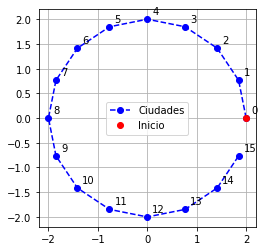

In [ ]:
coordenadas = []
segmentos = 16
rad = 2
cx = 0
cy = 0
angulo = np.linspace(0,2*np.pi,segmentos+1)
 
x = rad*np.cos(angulo)+cx
y = rad*np.sin(angulo)+cy
 
for i in range(len(x)-1):
  coordenadas.append([x[i],y[i]])

Graficar_TSP(coordenadas)

## Graficar Solución Óptima

In [ ]:
def graficarSolucion_TSP(L):
 
  sol_def = []
  sol_def.insert(0,0)
  i=1
  while i<len(L)+1:
    sol_def.insert(i,L[i-1])
    i=i+1
  
  coord_def = []
  for (i,j) in enumerate(coordenadas):
    coord_def.append(coordenadas[sol_def[i]])#
 
  x = [c[0] for c in coord_def]
  y = [c[1] for c in coord_def]
  fig = plt.figure()
  ax = plt.axes()
  plt.plot(x, y, '--bo', label='Ciudades');
  plt.plot(x[0], y[0], 'ro', label='Inicio');
  plt.gca().set_aspect('equal')
  for i, coord in enumerate(coord_def):
    ax.annotate(sol_def[i], (coord[0]+0.1, coord[1]+0.1))
  plt.legend()
  plt.title('Recorrido Óptimo de Ciudades para el problema de TSP')
  plt.grid()
  

## Función Fitness

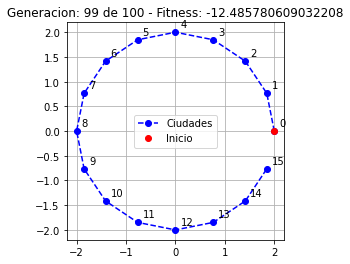

[[15, 12, 2, 1, 3, 4, 5, 6, 9, 8, 7, 10, 11, 13, 14], [15, 12, 2, 1, 3, 4, 5, 6, 9, 8, 7, 10, 11, 13, 14], [15, 12, 2, 1, 3, 4, 5, 6, 9, 8, 7, 10, 11, 13, 14], [15, 12, 2, 1, 3, 4, 5, 7, 6, 8, 9, 10, 11, 13, 14], [15, 12, 2, 1, 3, 4, 5, 7, 6, 8, 9, 10, 11, 13, 14], [15, 12, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 1], [15, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [15, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

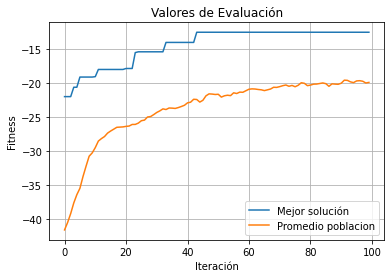

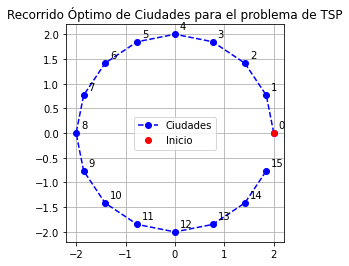

In [ ]:
def fitnessViajante(X_vars):
 
    fit = 0
    n = len(X_vars)
    for i in range(n-1):
        fit = fit + distancia(coordenadas[X_vars[i]],coordenadas[X_vars[i+1]])
    
    fit = fit + distancia(coordenadas[0],coordenadas[X_vars[0]]) + distancia(coordenadas[X_vars[n-1]],coordenadas[0])
 
    return -fit #SUMA DE LAS DISTANCIAS 
 
n = segmentos-1#cantidad de digitos #--30
Bounds = [[1,n] for i in range(n)]
Enteras = [True]*len(Bounds)
Fitness = fitnessViajante
cant_individuos = 500#80 ---460
cant_generac = 100#100 ---800
cant_elite = 2#1 --2
sel = sel_sus
eps = 0.1
xover = xov_partial_map
cant_cruzados = round(0.60 * cant_individuos)#0.60 --0.80
mut1 = mut_swap
cant_mutados_1 = round(0.20* cant_individuos)#0.20 --0.09
mut2 = mut_adjoin_swap
cant_mutados_2 = round(0.18* cant_individuos)#0.19 --0.09
callback = callback_graficar_TSP
 
Pop = init_pop_permutaciones(cant_individuos,Bounds)
 
sol, solF, Pop, Fit, traceBest, traceAvg, bestSols = \
    geneticoSimple(Pop, cant_generac, Bounds, Enteras, sel, xover, mut1,mut2, \
        cant_cruzados, cant_mutados_1,cant_mutados_2, cant_elite, eps, Fitness, callback)
 
print(bestSols)
 
print("Mejor solución: {0} (Fitness: {1})".format(sol, solF))
 
print("Fitness:{0}".format(solF))
 
print("Distancia:{0}".format(-solF))
 
graficarEvolucionFitness(traceBest, traceAvg)
 
g1 = graficarSolucion_TSP(sol)

# **Ejercicio 2** 

In [ ]:
def graficar_consumo_fases(consumos_clientes,sol):
  F = consumo_fases(consumos_clientes,sol)
  plt.title('Consumo - Transformador')
  plt.xlabel('Fase')
  plt.ylabel('Consumo mensual [KWh]')
  plt.bar([1,2,3],F)

def consumo_por_cliente_fases(consumos_iniciales):
  plt.title('Consumo eléctrico mensual de clientes')
  plt.xlabel('Cliente')
  plt.ylabel('Consumo eléctrico [KWh]')
  plt.bar([i for i in range(len(consumos_iniciales))],consumos_iniciales)

In [ ]:
import random
a = 0
b = 1000
n = 50
#lista con valores de consumo para cada cliente.
consumos_clientes = [round((b-a)*random.random()+a,2) for i in range(n)]
print(consumos_clientes)

[952.45, 598.04, 320.42, 685.73, 353.4, 470.57, 197.84, 652.39, 859.45, 713.87, 389.3, 337.36, 442.73, 504.07, 835.6, 275.76, 376.99, 70.07, 479.19, 41.6, 805.33, 270.82, 209.91, 777.84, 62.41, 671.87, 448.82, 125.2, 388.36, 316.94, 882.83, 858.8, 387.41, 535.21, 931.07, 991.44, 378.42, 701.6, 431.62, 329.57, 906.91, 487.9, 413.14, 126.68, 57.66, 758.53, 272.05, 885.48, 5.15, 817.02]


[3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 1, 1, 3, 2, 3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 2, 2, 3, 3, 1, 1, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3]


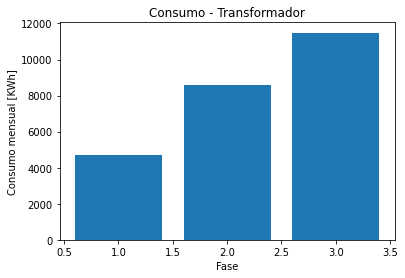

In [ ]:
a = 1
b = 3
n = 50
#lista con valor de la fase donde se conecta el cliente.
fases_clientes = [random.randint(a,b) for i in range(n)]
print(fases_clientes)
graficar_consumo_fases(consumos_clientes,fases_clientes)

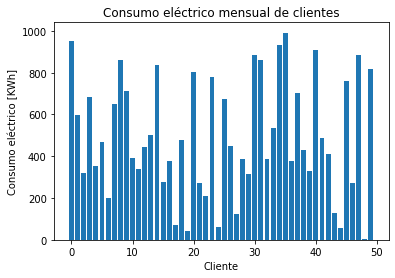

In [ ]:
consumo_por_cliente_fases(consumos_clientes)

## Función Fitness

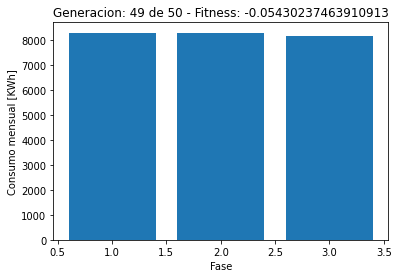

[[2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 1, 1, 3, 2, 3, 1, 3, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1], [2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 1, 1, 3, 2, 3, 1, 3, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1], [2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 1, 1, 3, 2, 3, 1, 3, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1], [2, 1, 1, 2, 1, 2, 2, 1, 3, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 2, 2, 1, 2, 3, 2, 1, 1, 1, 3, 2, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 1, 3, 3, 2, 2, 2, 3, 1, 3, 1], [1, 1, 2, 3, 1, 2, 2, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 2, 3, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 1, 1, 2, 3, 2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 2], [3, 3, 1, 3, 1, 2, 1, 2, 3, 1, 2, 2, 1, 3, 3, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 1, 3, 2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 3, 1, 1, 2], [3, 3, 1, 3, 1, 2, 1, 2, 3, 1, 2, 2, 1, 3, 3, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 1, 3,

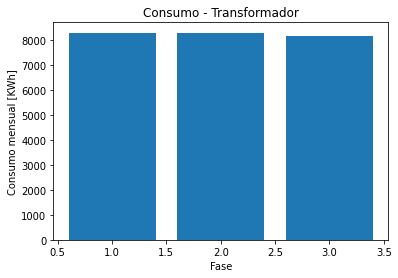

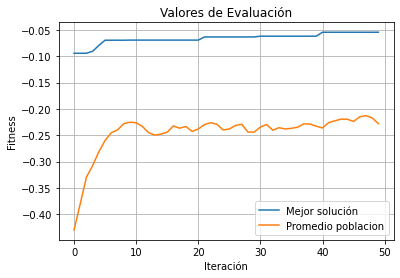

In [ ]:
def fitness_balance_carga(X_vars):
  #fit = 0
  #c_f = consumo_fases(consumos_clientes, X_vars)
  #idx = indice_desbalance(c_f)
  #fit += idx
  consumo = consumo_fases(consumos_clientes,X_vars)
  n_cambios = sum([1 if x!=fases_clientes[j] else 0 for j, x in enumerate(X_vars)])
  n = len(X_vars) #cantidad de casas

  alpha = 0.9;

  fit = alpha * (indice_desbalance(consumo)/100) + (1-alpha)*(n_cambios/n)
  return -fit

n = 50
Bounds = [[1,3] for i in range(n)]
Enteras = [True]*len(Bounds)
f = fitness_balance_carga
cant_individuos = 200
cant_generac = 50
cant_elite = 2
sel = sel_sus
eps = 0.1
xover = xov_uniform
cant_cruzados = round(0.60 * cant_individuos)
mut1 = mut_boundary
cant_mutados_1 = round(0.38 * cant_individuos)
mut2 = None
cant_mutados_2 = round(0.00 * cant_individuos)
 
Pop = init_pop(cant_individuos, Bounds)
 
callback = callback_graficar_desbalance
 
sol, solF, Pop, Fit, traceBest, traceAvg, bestSols = \
    geneticoSimple(Pop, cant_generac, Bounds, Enteras, sel, xover, mut1,mut2, \
        cant_cruzados, cant_mutados_1,cant_mutados_2, cant_elite, eps, f, callback)
 
print(bestSols)
graficarCaminata(f, bestSols,  Bounds, 0.1, alpha=0.2)
 
graficar_consumo_fases(consumos_clientes,sol)
 
print("Mejor solución: {0} (Fitness: {1})".format(sol, solF))
print("Fitness:{0}".format(solF))
 
graficarEvolucionFitness(traceBest, traceAvg)

In [ ]:
X = consumo_fases(consumos_clientes,fases_clientes)
print(X)

[4729.62, 8576.529999999999, 11486.669999999998]


In [ ]:
Y = consumo_fases(consumos_clientes,sol)
print(Y)

[8303.779999999999, 8299.050000000001, 8189.989999999999]


# **Ejercicio 3** 

## Gráfico de consumo de vapor óptimo

In [ ]:
def graficar_consumo_tachos(sol):
 
  vapor_i = []
  for i in range(len(sol)):
    vt_i = [VaporTacho_i(t,sol[i]) for t in intervalo]
    vapor_i.append(vt_i)
  
  for i in range(len(vapor_i)):
    plt.plot(intervalo,vapor_i[i],label="Tacho {0}".format(i));
 
  vapor_total = VaporTotal(sol,intervalo)
 
  plt.plot(intervalo,vapor_total,label='Total');
  plt.title("Solución Óptima")
  plt.legend()
  plt.grid()

## Función Fitness

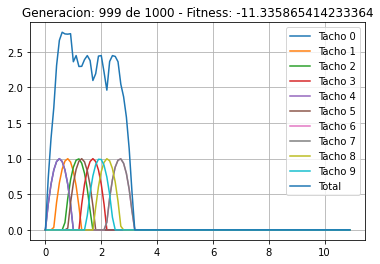

[[0.0, 2.2189500981139396, 3.5777111682587237, 0.05599589985551717, 4.532148429736331, 4.859676241432746, 2.361763443197364, 0.31951388904464717, 1.8444867863159513, 0.4828888233085258], [0.0, 2.2189500981139396, 3.5777111682587237, 0.05599589985551717, 4.532148429736331, 4.859676241432746, 2.361763443197364, 0.31951388904464717, 1.8444867863159513, 0.4828888233085258], [0.0, 2.701961031842367, 1.3186074954315519, 0.6509657314809868, 1.435586545471599, 5.072942024961595, 4.2860915254263805, 1.9594306385756344, 2.70368154523573, 4.879217996888908], [0.0, 0.013327681817443482, 3.5777111682587237, 0.7557890234598356, 3.462932145999931, 2.356155486834213, 2.126805925207142, 0.31951388904464717, 1.8444867863159513, 0.4828888233085258], [0.0, 0.013327681817443482, 3.5777111682587237, 0.7557890234598356, 3.462932145999931, 2.356155486834213, 2.126805925207142, 0.31951388904464717, 1.8444867863159513, 0.4828888233085258], [0.0, 0.013327681817443482, 3.5777111682587237, 0.7557890234598356, 3.46

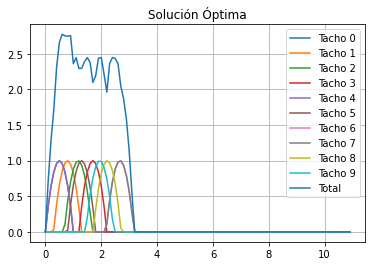

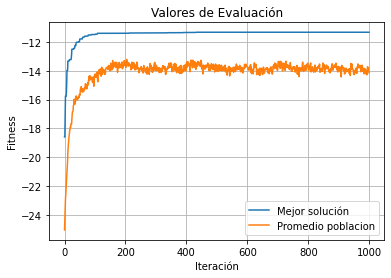

In [ ]:
import random
def fitness_tachos(x_vars):
  
  alpha_1 = 1 
  vapor_Total = VaporTotal(x_vars,intervalo)
  objetivo_1 = max(vapor_Total)
 
  alpha_2 = 2.5
  tiempo_span = abs(max(x_vars) - min(x_vars))
  objetivo_2 = tiempo_span
 
  alpha_3 = 1.7
 
  tiempos_ordenados = sorted(x_vars)
  vapor_ordenado = VaporTotal(tiempos_ordenados,intervalo)
 
  m = len(vapor_ordenado)
  suma = sum(vapor_ordenado)
 
  prom = suma/m
 
  eliminar_extremos = vapor_ordenado[10:-10]
 
  #eliminar_extremos = vapor_ordenado.copy()
  #eliminar_extremos.insert(0,vapor_ordenado[0]+0.5)
 
  #n = len(eliminar_extremos)
 
  #eliminar_extremos.insert(n-1,vapor_ordenado[m-1]+0.5)
 
  
  #delta_vapores = abs(max(eliminar_extremos) - min(eliminar_extremos))
 
  delta_vapores = abs(max(eliminar_extremos) - prom)
 
  objetivo_3 = delta_vapores #Medida para lograr que el vapor sea constante
 
  return -((alpha_1*objetivo_1) + (alpha_2*objetivo_2) + (alpha_3*objetivo_3))
 
tiempo_inicial = 0
cant_tachos = 10
intervalo = [x/10 for x in range(10*cant_tachos+10)]
Bounds = [[tiempo_inicial,cant_tachos-1] for i in range(cant_tachos-1)]
Bounds.insert(0,[tiempo_inicial,tiempo_inicial])
Enteras = [False]*len(Bounds)
f = fitness_tachos
cant_individuos = 200
#cant_generac = 100
cant_elite = 2
sel = sel_sus
eps = 0.1
xover = xov_uniform
cant_cruzados = round(0.60 * cant_individuos)
mut1 = mut_non_uniform
cant_mutados_1 = round(0.20 * cant_individuos)
mut2 = mut_step
cant_mutados_2 = round(0.18 * cant_individuos)
 
Pop = init_pop(cant_individuos, Bounds)
 
callback = callback_graficar_tachos
 
sol, solF, Pop, Fit, traceBest, traceAvg, bestSols = \
    geneticoSimple(Pop, cant_generac_1, Bounds, Enteras, sel, xover, mut1,mut2, \
        cant_cruzados, cant_mutados_1,cant_mutados_2, cant_elite, eps, f, callback)
 
print(bestSols)
graficarCaminata(f, bestSols,  Bounds, 0.1, alpha=0.2)
 
graficar_solucion = graficar_consumo_tachos(sol)
 
print("Mejor solución: {0} (Fitness: {1})".format(sol, solF))
print("Fitness:{0}".format(solF))
 
graficarEvolucionFitness(traceBest, traceAvg)